In [1]:
import json
def load_json(file_path):
    """
    Load a JSON file and return its content as a Python dictionary.

    Parameters:
        file_path (str): The path to the JSON file.

    Returns:
        dict: The content of the JSON file as a dictionary.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data
def save_json(data, file_path):
    """
    Save a Python dictionary to a JSON file.

    Parameters:
        data (dict): The data to save.
        file_path (str): The path where the JSON file will be saved.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

In [2]:
path_list = [
"/data_ssd/mscoco-detection/check_length/paligemma_actual_detection_exist_check/check-length_test_mscoco2017_actual_detection_for_paligemma_cat_label_format_check.json",
"/data_ssd/mscoco-detection/check_length/paligemma_actual_detection_exist_check/check-length_train_mscoco2017_actual_detection_for_paligemma_cat_label_format_check.json",
"/data_ssd/mscoco-detection/check_length/paligemma_actual_detection_exist_check/check-length_val_mscoco2017_actual_detection_for_paligemma_cat_label_format_check.json",
]

In [3]:
data = []
for path in path_list:
    data.extend(load_json(path))

In [4]:
print(data[0])

{'total_ids_length': 615, 'input_ids_length': 451, 'output_ids_length': 164, 'source': {'id': 397133, 'image': 'mscoco2017/coco/images/val2017/000000397133.jpg', 'conversations': [{'from': 'human', 'value': '<image>Detect objects in this image from the following categories: [person ; bicycle ; car ; motorcycle ; airplane ; bus ; train ; truck ; boat ; traffic light ; fire hydrant ; stop sign ; parking meter ; bench ; bird ; cat ; dog ; horse ; sheep ; cow ; elephant ; bear ; zebra ; giraffe ; backpack ; umbrella ; handbag ; tie ; suitcase ; frisbee ; skis ; snowboard ; sports ball ; kite ; baseball bat ; baseball glove ; skateboard ; surfboard ; tennis racket ; bottle ; wine glass ; cup ; fork ; knife ; spoon ; bowl ; banana ; apple ; sandwich ; orange ; broccoli ; carrot ; hot dog ; pizza ; donut ; cake ; chair ; couch ; potted plant ; bed ; dining table ; toilet ; tv ; laptop ; mouse ; remote ; keyboard ; cell phone ; microwave ; oven ; toaster ; sink ; refrigerator ; book ; clock ; 

In [5]:
length_list = []
for index, item in enumerate(data):
    # print(index)
    length = item["total_ids_length"]
    length_list.append(length)
print(f"max length: {max(length_list)}")

max length: 1122


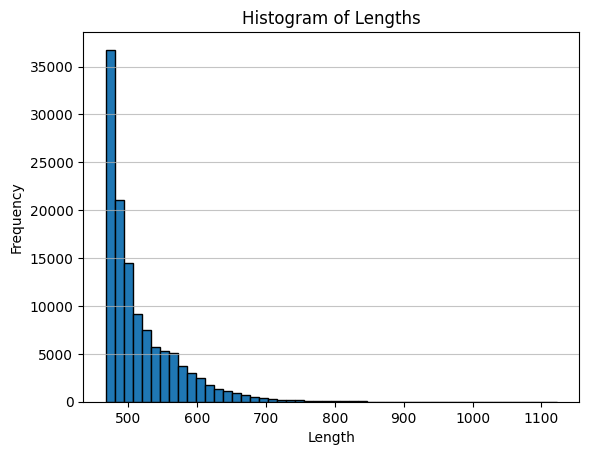

In [6]:
import matplotlib.pyplot as plt
plt.hist(length_list, bins=50, edgecolor='black')
plt.title('Histogram of Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [7]:
max_output_len = 512 + 256
under_max_list = [l for l in length_list if l <= max_output_len]
print(f"max length under {max_output_len}: {max(under_max_list)}")

max length under 768: 768


In [8]:
print(len(data))
print(len(under_max_list))

122218
121876


# 切り詰めjson作成

In [9]:
max_output_len = 768
path_dict = {
"train": "/data_ssd/mscoco-detection/check_length/paligemma_actual_detection_exist_check/check-length_train_mscoco2017_actual_detection_for_paligemma_cat_size_format_check.json",
"val": "/data_ssd/mscoco-detection/check_length/paligemma_actual_detection_exist_check/check-length_val_mscoco2017_actual_detection_for_paligemma_cat_size_format_check.json",
}

save_path_dict = {
"train": "/data_ssd/mscoco-detection/paligemma_actual_detection_exist_check/train_mscoco2017_actual_detection_for_paligemma_cat_size_format_check_under768.json",
"val": "/data_ssd/mscoco-detection/paligemma_actual_detection_exist_check/val_mscoco2017_actual_detection_for_paligemma_cat_size_format_check_under768.json",
}

for key in path_dict.keys():
    data = load_json(path_dict[key])
    new_data = [item["source"] for item in data if item["total_ids_length"] <= max_output_len]
    print(f"{key}: {len(data)} -> {len(new_data)}")
    save_json(new_data, save_path_dict[key])

train: 105539 -> 105237
val: 11727 -> 11697


In [10]:
max_output_len = 768
path_dict = {
"train": "/data_ssd/mscoco-detection/check_length/paligemma_actual_detection_exist_check/check-length_train_mscoco2017_actual_detection_for_paligemma_cat_label_format_check.json",
"val": "/data_ssd/mscoco-detection/check_length/paligemma_actual_detection_exist_check/check-length_val_mscoco2017_actual_detection_for_paligemma_cat_label_format_check.json",
}

save_path_dict = {
"train": "/data_ssd/mscoco-detection/paligemma_actual_detection_exist_check/train_mscoco2017_actual_detection_for_paligemma_cat_label_format_check_under768.json",
"val": "/data_ssd/mscoco-detection/paligemma_actual_detection_exist_check/val_mscoco2017_actual_detection_for_paligemma_cat_label_format_check_under768.json",
}

for key in path_dict.keys():
    data = load_json(path_dict[key])
    new_data = [item["source"] for item in data if item["total_ids_length"] <= max_output_len]
    print(f"{key}: {len(data)} -> {len(new_data)}")
    save_json(new_data, save_path_dict[key])

train: 105539 -> 105237
val: 11727 -> 11697


In [ ]:
"id": "000021"